In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils

In [ ]:
class OHLC(dataset):
  def __init__(self, csv_file):
    sef.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label = 

In [ ]:
train_set = torchvision.datasets.MNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
      transforms.ToTensor()
    ])
)

Extracting ./data/FashionMNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/MNIST/raw


Extracting ./data/FashionMNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/MNIST/raw



Extracting ./data/FashionMNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/MNIST/raw


Extracting ./data/FashionMNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
sample = next(iter(train_set))

In [ ]:
len(sample)

2

In [ ]:
type(sample)

tuple

In [ ]:
image, label = sample

In [ ]:
sample[0].shape

torch.Size([1, 28, 28])

In [ ]:
type(sample[0])

torch.Tensor

In [ ]:
type(sample[1])

int

label:  5


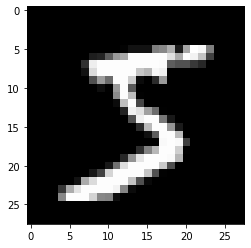

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
print('label: ', label)

In [ ]:
batch = next(iter(train_loader))

In [ ]:
image, label = batch

In [ ]:
image.shape

torch.Size([10, 1, 28, 28])

In [ ]:
label.shape

torch.Size([10])

labels:  tensor([1, 7, 3, 4, 8, 6, 9, 7, 1, 8, 1, 2, 6, 2, 2, 4, 4, 5, 9, 0, 2, 1, 0, 4, 1, 9, 4, 4, 7, 9, 1, 4, 6, 5, 8, 3, 6,
        4, 3, 8, 2, 1, 1, 9, 2, 5, 7, 6, 2, 3, 8, 5, 2, 9, 5, 2, 3, 6, 3, 6, 6, 6, 8, 3, 0, 4, 9, 2, 7, 6, 8, 6, 1, 3,
        7, 4, 8, 6, 3, 6, 3, 1, 4, 5, 6, 7, 0, 0, 9, 1, 9, 8, 5, 5, 8, 8, 5, 7, 2, 9])


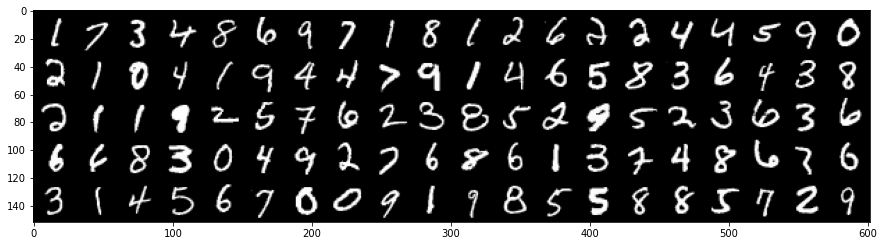

In [ ]:
grid = torchvision.utils.make_grid(image, nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print("labels: ", label)

In [ ]:
class Network():
  def __init__(self):
    self.layer = None


  def forward(self, t):
    t = self.layer(t)
    return t

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.layer = None

  
  def forward(self,t):
    t = self.layer(t)
    return t

In [19]:
import torch.nn as nn
import numpy as np

In [11]:
# the class Network extends pytorch nn.Module
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
      return t
# 
    # def __repr__(self):
    #   return "Just a sample string to override the default one"

In [12]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [13]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [14]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [15]:
network.conv1.weight

Parameter containing:
tensor([[[[-0.1416,  0.0608, -0.1070,  0.0257,  0.1944],
          [-0.0883,  0.0133,  0.1961,  0.0626,  0.1730],
          [-0.0356,  0.1635,  0.0105,  0.1006,  0.0083],
          [-0.1691,  0.1828,  0.0217, -0.1026, -0.1454],
          [-0.0112,  0.0072, -0.0482, -0.1662,  0.1654]]],


        [[[-0.1601,  0.0511, -0.0386,  0.1376, -0.0546],
          [-0.0746,  0.1173,  0.1647, -0.1553,  0.1437],
          [ 0.1182,  0.1771,  0.1239,  0.0251,  0.0272],
          [ 0.0504,  0.1916, -0.0854,  0.0205,  0.0490],
          [ 0.0157,  0.1224, -0.1625,  0.1623, -0.1206]]],


        [[[ 0.1441, -0.1728,  0.1831,  0.0785, -0.1602],
          [-0.1584, -0.0332, -0.0459,  0.1566,  0.0844],
          [ 0.0404, -0.1410, -0.0064,  0.1389,  0.0929],
          [ 0.0826, -0.1599, -0.0810,  0.1781,  0.0189],
          [ 0.1864,  0.0820,  0.1260,  0.1433,  0.1287]]],


        [[[ 0.0825,  0.1672,  0.1329,  0.1815,  0.1558],
          [ 0.0130, -0.1132, -0.0267,  0.1662,  0.0185

In [24]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [25]:
network.fc2.weight.shape

torch.Size([60, 120])

In [26]:
network.out.weight.shape

torch.Size([10, 60])